# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

## Step 1: Load the python libraries that you will need for this project 

In [2]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import psycopg2 as psy
import seaborn as sns
%matplotlib inline

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [3]:
master = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/starter-code/MASTERProject7.csv')

In [4]:
master.head(1)

,Unnamed: 0,Key,Airport,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28


# Explore by Airport

In [18]:
# create dataframe of airports and if they are on time
Airport_region_on_time = master[['Airport','percent on-time gate departures','percent on-time airport departures','percent on-time gate arrivals','average_taxi_out_time']]

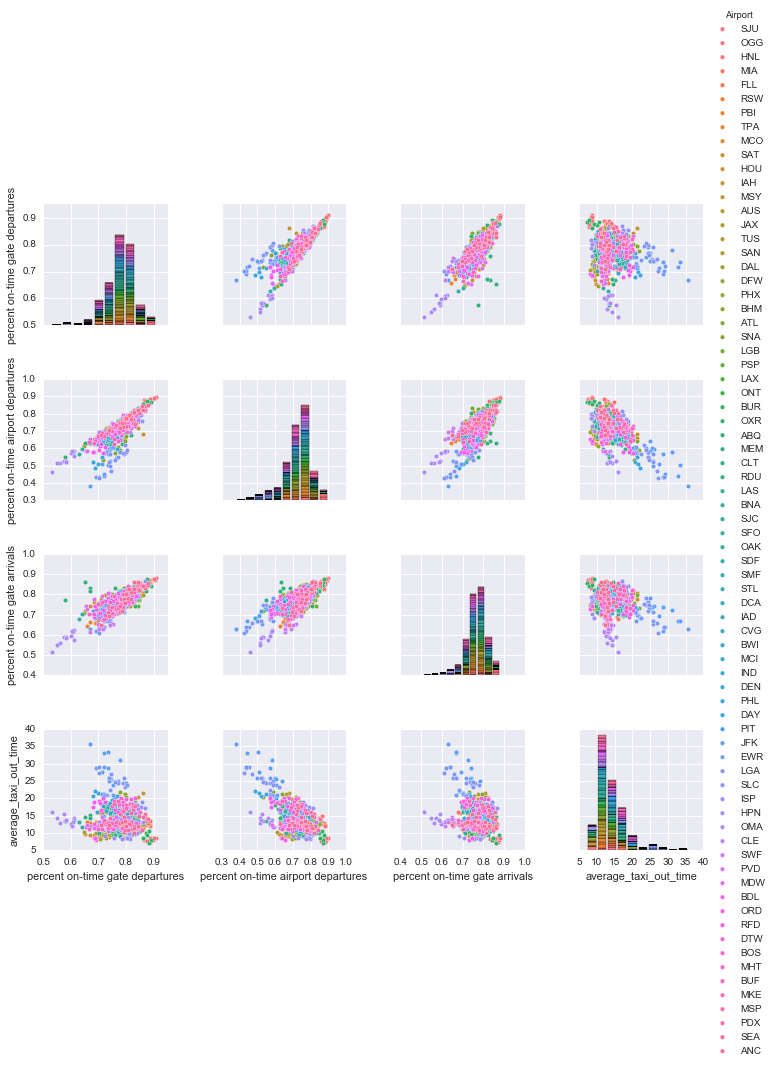

In [19]:
sns.set()
sns.pairplot(Airport_region_on_time, hue="Airport")

## Explore by FAA REGION

In [10]:
# create dataframe of 
FAA_region_on_time = master[['FAA REGION','percent on-time gate departures','percent on-time airport departures','percent on-time gate arrivals','average_taxi_out_time']]

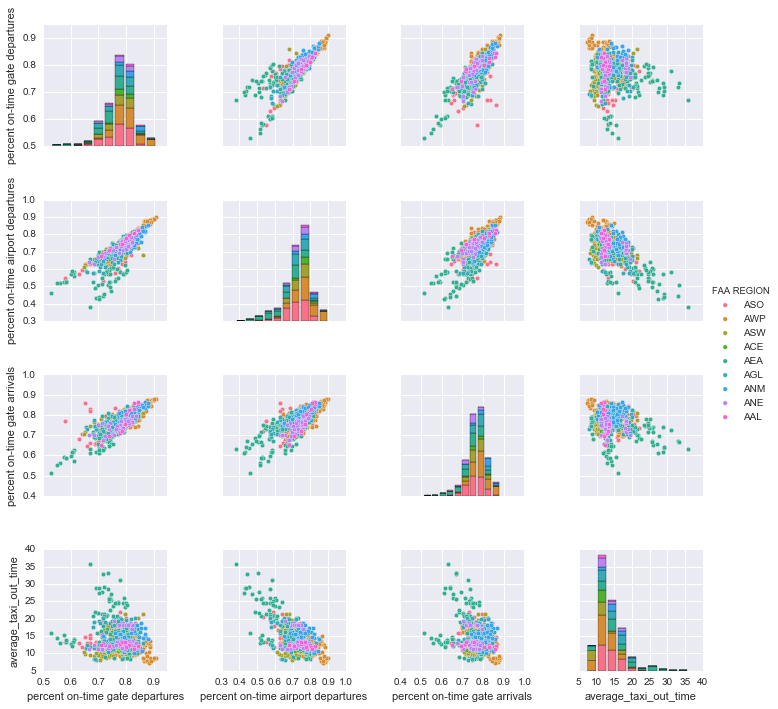

In [6]:
sns.set()
sns.pairplot(FAA_region_on_time, hue="FAA REGION")

In [14]:
FAA_region_airborne_delay = master[['FAA REGION','average airborne delay']]

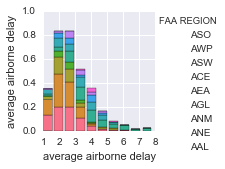

In [15]:
sns.set()
sns.pairplot(FAA_region_airborne_delay, hue="FAA REGION")

In [16]:
FAA_region_delays = master[['FAA REGION','average_gate_departure_delay', 'average_taxi_out_time',
                                    'average taxi out delay', 'average airport departure delay',
                                    'average airborne delay', 'average taxi in delay', 'average block delay', 'average gate arrival delay']]

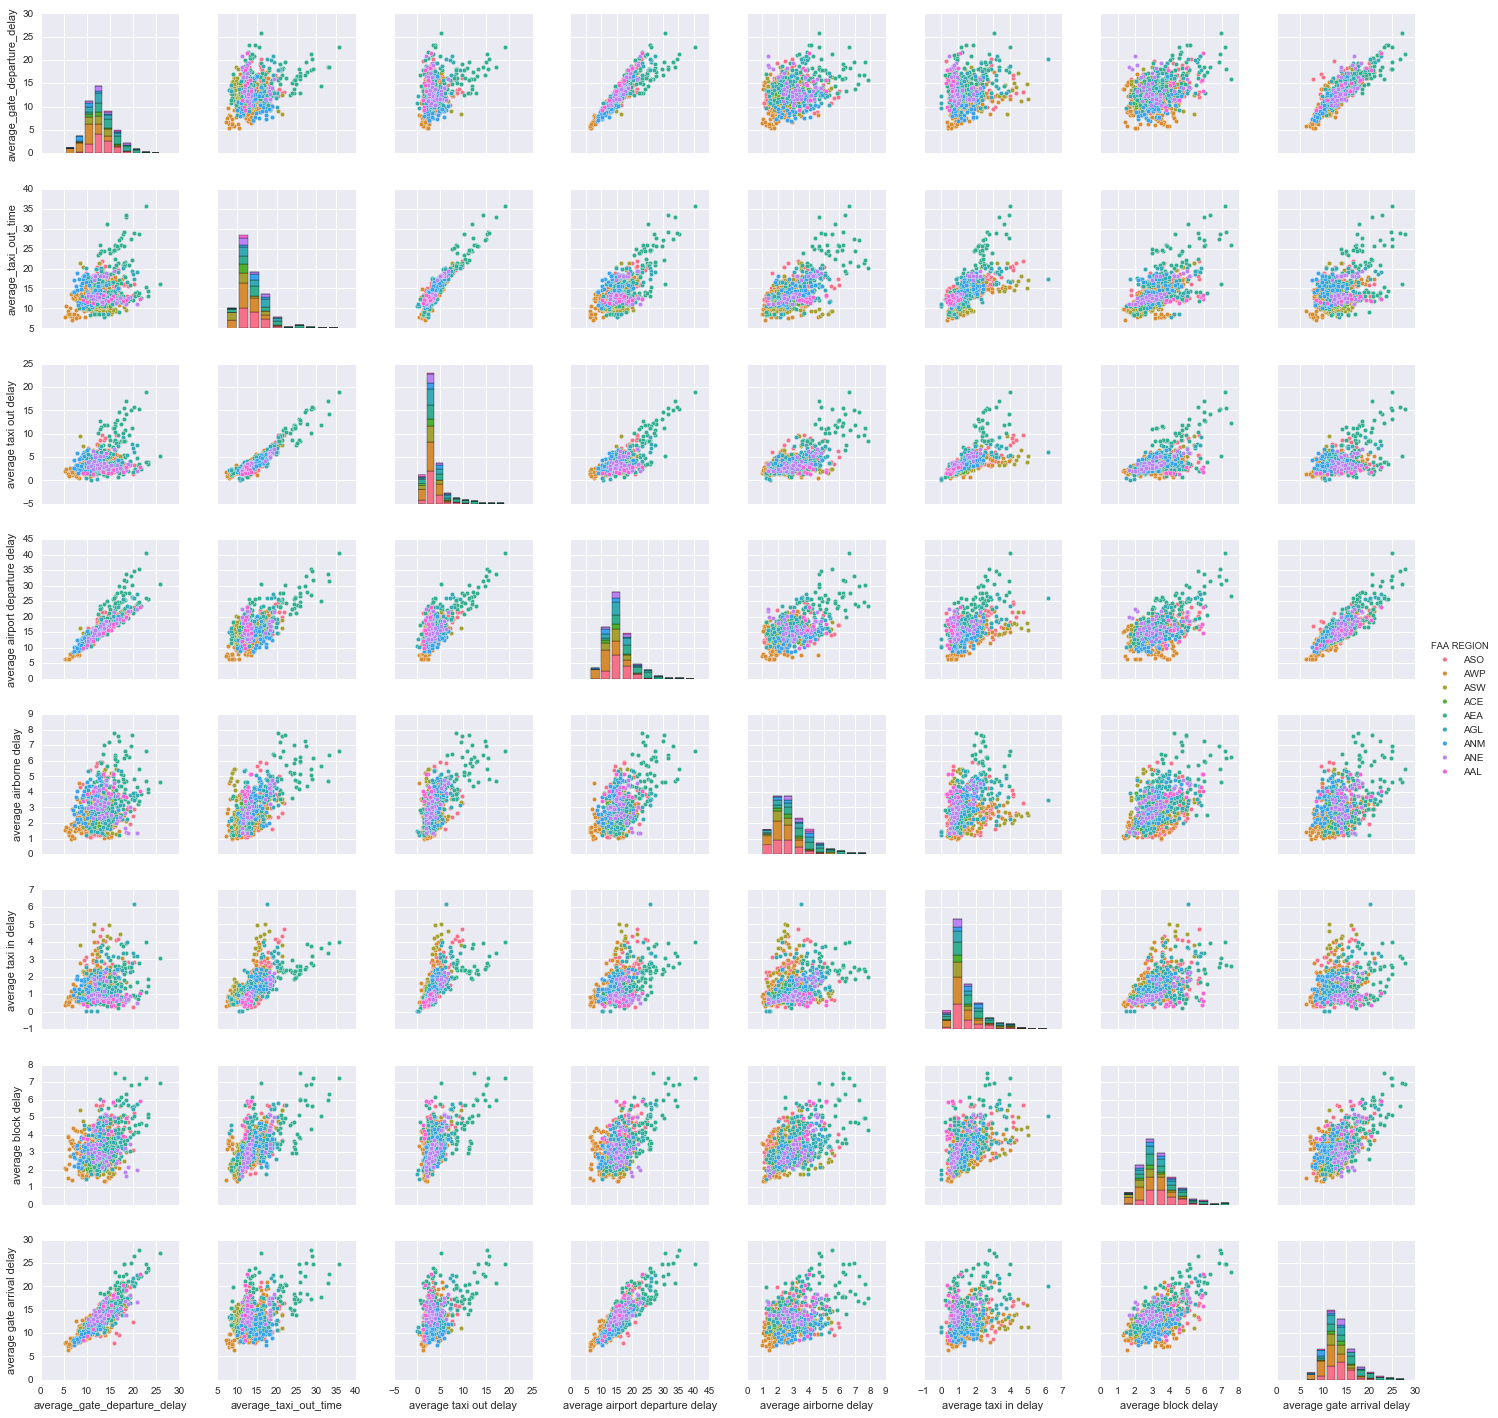

In [17]:
sns.set()
sns.pairplot(FAA_region_delays, hue="FAA REGION")

In [20]:
master.head(2)

,Unnamed: 0,Key,Airport,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28
1,1,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,...,0.7464,0.7604,12.74,14.14,3.03,14.43,1.63,1.36,4.04,14.65


# Departure and Arrival Percentages by Airport and FAA Region

In [ ]:
# departure cancelattion percentage

# departure perecentage(whatever is elft)

# arrival cancelattion percentage

# arrival percentage( wehateveer is levft)

In [64]:
tmp = master[[2,6,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]

In [65]:
tmp.head(2)

,Airport,FAA REGION,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,SJU,ASO,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28
1,SJU,ASO,315.0,282.0,64.0,36.0,57736.0,54870.0,0.7789,0.7464,0.7604,12.74,14.14,3.03,14.43,1.63,1.36,4.04,14.65


In [66]:
tmp['Arrival Percentage'] = (1.0 - tmp['Arrival Cancellations'] / tmp['arrivals for metric computation'])

/Users/Paul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
tmp['Departure Percentage'] = (1.0 - tmp['Departure Cancellations'] / tmp['departures for metric computation'])

/Users/Paul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
tmp['No Diversion Percentage'] = (1.0 -((tmp['Departure Diversions']+tmp['Arrival Diversions']) /((tmp['departures for metric computation']+tmp['arrivals for metric computation'])/2)))

/Users/Paul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
# get an average of all 3 
tmp['Overall Chance of No Problems'] = ((tmp['Departure Percentage']+tmp['Arrival Percentage']+tmp['No Diversion Percentage'])/3)

/Users/Paul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [74]:
tmp.head()

,Airport,FAA REGION,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Arrival Percentage,Departure Percentage,No Diversion Percentage,Overall Chance of No Problems
0,SJU,ASO,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,...,2.27,12.43,1.88,0.79,3.39,12.28,0.994906,0.994534,0.998582,0.996007
1,SJU,ASO,315.0,282.0,64.0,36.0,57736.0,54870.0,0.7789,0.7464,...,3.03,14.43,1.63,1.36,4.04,14.65,0.994861,0.994544,0.998224,0.995876
2,SJU,ASO,257.0,233.0,63.0,44.0,55707.0,52948.0,0.8054,0.7446,...,4.28,14.34,1.73,1.29,4.19,14.17,0.995599,0.995387,0.998030,0.996339
3,SJU,ASO,307.0,278.0,70.0,42.0,47987.0,47246.0,0.8014,0.7522,...,3.16,14.97,1.55,1.71,4.09,16.31,0.994116,0.993602,0.997648,0.995122
4,SJU,ASO,238.0,197.0,78.0,29.0,44493.0,43448.0,0.8004,0.7810,...,1.85,13.59,1.64,1.25,3.75,15.18,0.995466,0.994651,0.997567,0.995894


In [82]:
# save tmp for next stage
import csv


tmp.to_csv('MASTER_Project7_withNoProbelmPerecent.csv')

In [77]:
airport_arrival_percent = tmp[[0,1,19,20,21,22]]

In [79]:
#airport_arrival_percent

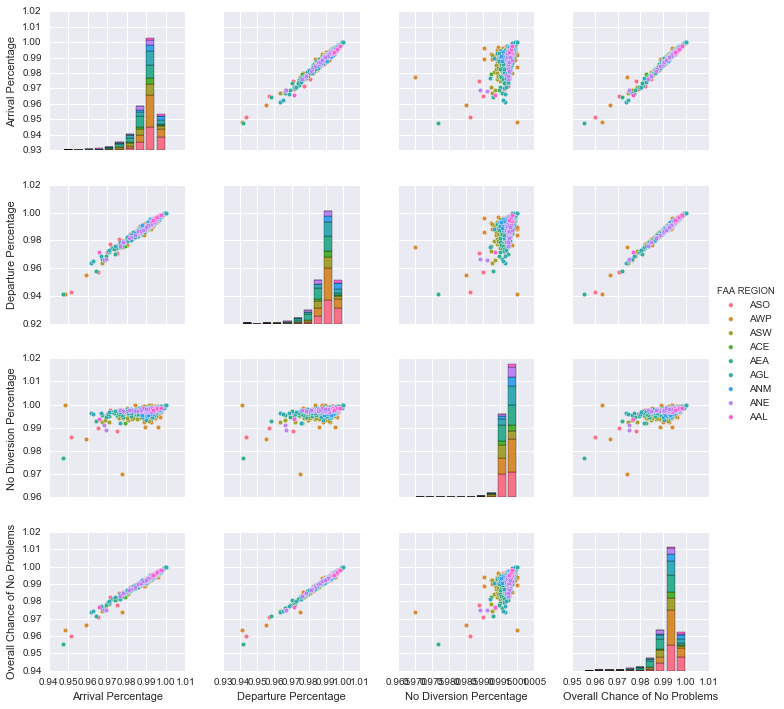

In [80]:
sns.set()
sns.pairplot(airport_arrival_percent, hue="FAA REGION")

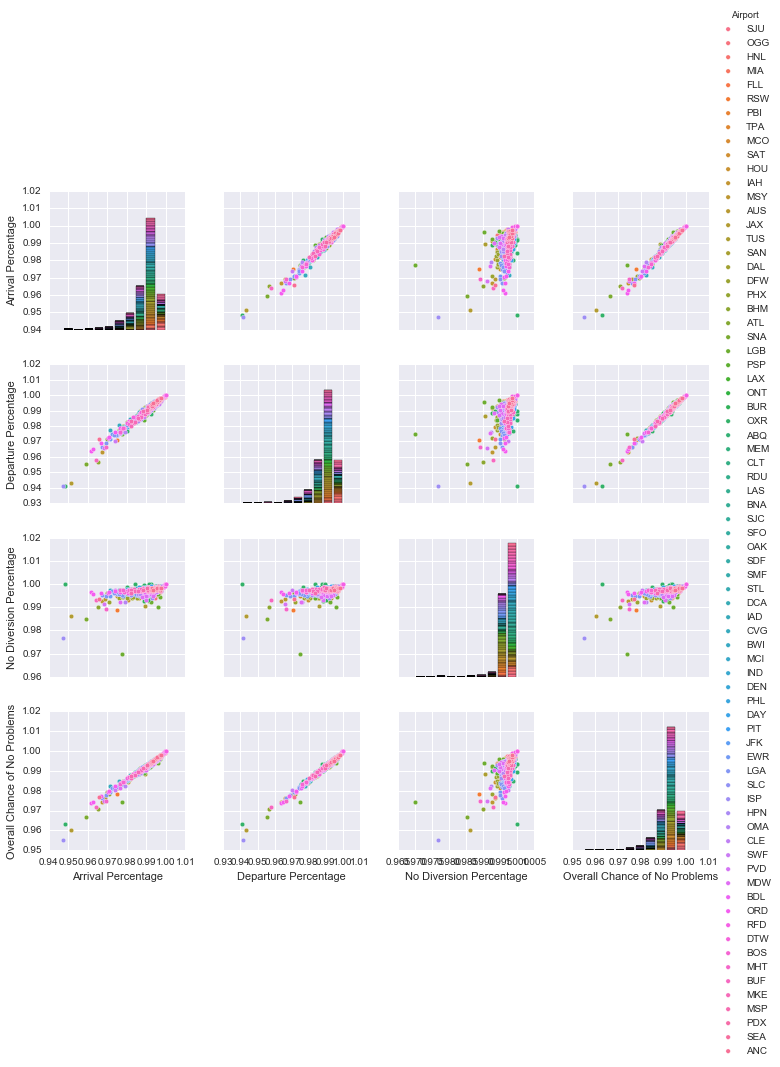

In [81]:
sns.set()
sns.pairplot(airport_arrival_percent, hue="Airport")